Name: Arijit Roy Chowdhury
    
Email: rc.arijit@gmail.com
    
Role: Data Scientist

# Correlation-and-Multicollinearity-Treatment

Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation.

A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases. An example of positive correlation would be height and weight. Taller people tend to be heavier.

A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other. An example of negative correlation would be height above sea level and temperature. As you climb the mountain (increase in height) it gets colder (decrease in temperature).

A zero correlation exists when there is no relationship between two variables. For example there is no relationship between the amount of tea drunk and level of intelligence.

Machine Learning Models may be sensitive to Correlation between variables and hence we need to treat them by either dropping twin variables or performing Feature Engineering to combine 2 or more variables into one by establishing some kind of linear relationship between them

# Import Libraries

In [41]:
import time
import random
import pandas as pd
import pandas_profiling as pp
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 200) 

In [32]:
# Read the CSV File using Pandas and store it as a dataframe 'df':

df = pd.read_csv('Dataset/Weather.csv')
df.head()

,Date,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level (hPa),Average relative humidity,Total rainfall and / or snowmelt (mm),Average visibility (Km),Average wind speed (Km/h),Maximum sustained wind speed (Km/h),PM2.5
0,01/01/2013,9.1,15.3,4.0,1015.6,90.0,0.0,0.5,0.0,14.8,284.795833
1,02/01/2013,7.4,9.8,4.8,1017.6,93.0,0.0,0.5,4.3,9.4,239.695455
2,03/01/2013,7.8,12.7,4.4,1018.5,87.0,0.0,0.6,4.4,11.1,182.187500
3,07/01/2013,6.7,13.4,2.4,1019.4,82.0,0.0,0.6,4.8,11.1,264.064286
4,08/01/2013,8.6,15.5,3.3,1018.7,72.0,0.0,0.8,8.1,20.6,223.208333


In [33]:
# Check for Missing Data

total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

# Insight: There is no missing data in any of the columns

,Total,Percent
Date,0,0.0
Average Temperature,0,0.0
Maximum temperature,0,0.0
Minimum temperature,0,0.0
Atmospheric pressure at sea level (hPa),0,0.0
Average relative humidity,0,0.0
Total rainfall and / or snowmelt (mm),0,0.0
Average visibility (Km),0,0.0
Average wind speed (Km/h),0,0.0
Maximum sustained wind speed (Km/h),0,0.0


# Plot Correlation Matrix

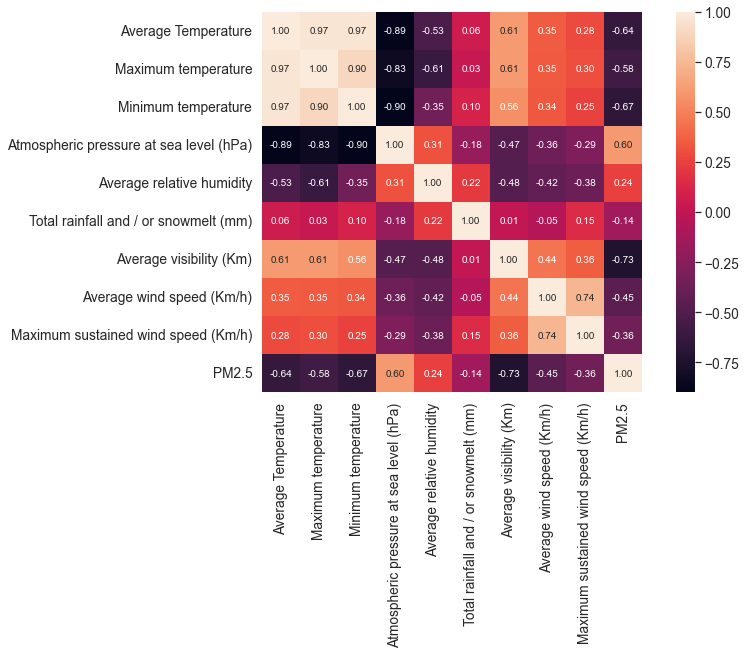

In [35]:
# Create Correlation Matrix
corrmat = df.corr()
cols = corrmat.columns

# Correlation Matrix
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12,7))
sns.set(font_scale=1.25)

# Plot the Heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)

# Insight: Average Temperature, Maximum Temperature and Minimum Temperature has strong positive correlation
# Average Temperature, Maximum Temperature and Minimum Temperature has strong negative correlation with Atmospheric Pressure
# Average Wind Speed and Maximum sustained wind speed has strong positive correlation

Highly correlated columns don’t add value and can throw off
feature importance and interpretation of regression coefficients.

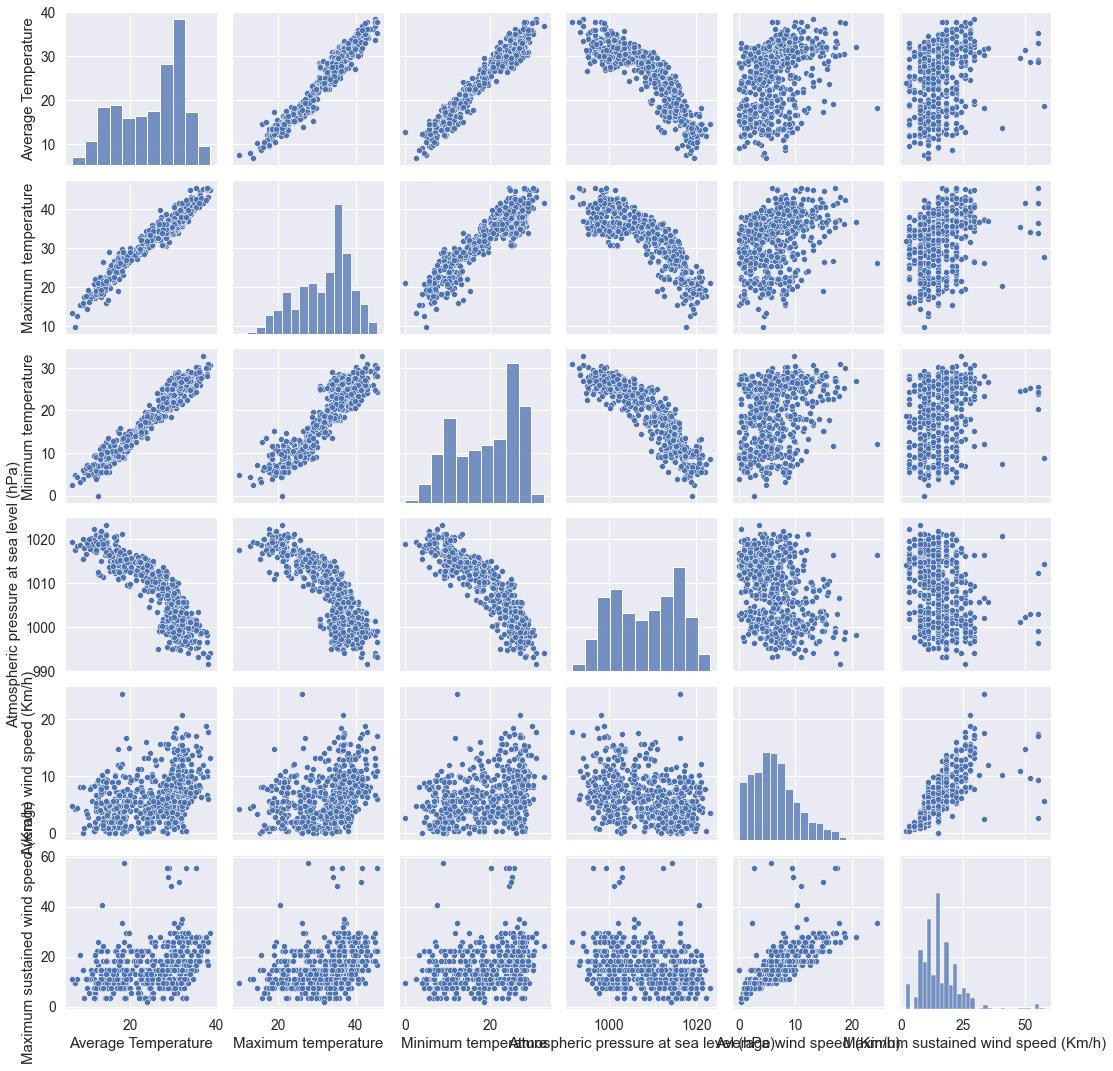

In [39]:
# The same is observed from the scatter plots as well:
sns.pairplot(df.drop(['PM2.5', 'Average relative humidity', 'Average visibility (Km)', 'Total rainfall and / or snowmelt (mm)'], axis=1))

# Variance Inflation Factor

Variance inflation factors range from 1 upwards. The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors.

A rule of thumb for interpreting the variance inflation factor:

    1 = not correlated.
    Between 1 and 5 = moderately correlated.
    Greater than 5 = highly correlated.

In [45]:
# Calculate Variance Inflation Factor for all correlated variables

# the independent variables set
X = df.drop(['Date', 'PM2.5'], axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

                                   feature         VIF
0                      Average Temperature  930.136518
1                      Maximum temperature  474.676282
2                      Minimum temperature  276.097283
3  Atmospheric pressure at sea level (hPa)  311.491135
4                Average relative humidity   79.375755
5    Total rainfall and / or snowmelt (mm)    1.299401
6                  Average visibility (Km)   17.761571
7                Average wind speed (Km/h)    9.487359
8      Maximum sustained wind speed (Km/h)   12.229796


In [ ]:
# By now we have 3 statistical evidences (Correlation Heatmap, Pairplot and VIF) to prove that:
# Average Temperature, Maximum Temperature and Minimum Temperature has strong negative correlation with Atmospheric Pressure
# Average Wind Speed and Maximum sustained wind speed has strong positive correlation

# Hence we will drop Average Temperature, Maximum Temperature, Minimum Temperature and Maximum sustained wind speed

# Drop Twin Variables or Strongly Correlated Columns

In [46]:
df = df.drop(['Date', 'Average Temperature', 
              'Maximum temperature', 
              'Minimum temperature', 
              'Maximum sustained wind speed (Km/h)'], axis=1)

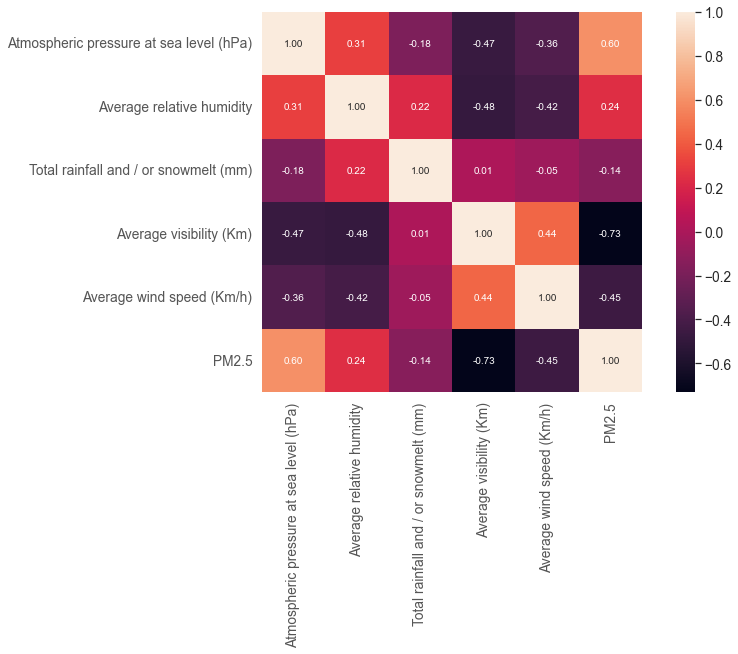

In [47]:
# Create Correlation Matrix again to verify the effect of dropping Twin Variables
corrmat = df.corr()
cols = corrmat.columns

# Correlation Matrix
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(12,7))
sns.set(font_scale=1.25)

# Plot the Heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)

In [ ]:
# Bingo! We have successfully dropped all Twin Variables